In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [2]:
# 데이터를 마냥 쉽게 긁어 올수는없음 그럴때는 어떻할까??? 

## Selenium

+ 원격으로 조정할 수 있는 웹페이지
+ 코딩으로 로그인을 시킬 수 있음. 
+ 내가 코드로 조정할 수 있다는 것임. 

+ Chrome Driver 또는 PhantomJS 를 이용해서 원격으로 연결시켜줄 수 있는 프로그램

    - 구글에서 'chrome driver' 로 검색해서 현재 버전에 맞는 프로그램을 다운로드(현재 그롬브라우져에 맞는 드라이버 설치하면 댐)
    
  95.0.4638.69
  
+ pip install selenium

In [2]:
# 설치 test
from selenium import webdriver

In [11]:
driver=webdriver.Chrome('C:/Program Files/cd/chromedriver.exe')
driver.get('https://www.naver.com')
### 실행하면 브라우저 창이 하나 생김 --> 이게 아바타임.

In [12]:
#### 현재 화면을 스크린 샷을 할 수 있음 
driver.save_screenshot('data/001.png')

True

In [13]:
#### 브라우저 닫기도 코드로 할 수 있음. 
driver.close()

In [16]:
#### 메일 내용을 수집을 해야한다. 로그인을 해야 데이터를 긁어 올 수 있을 때 
#--> 이것을 자동적으로 접근해서 해야할 때도 코드로 자동화 할 수 있음 
driver=webdriver.Chrome('C:/Program Files/cd/chromedriver.exe')
driver.get('https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net%2F')


In [26]:
## 로그인 할려고 할때
# id 창에 접근할 수 tag를 가져 와야함. --> 브라우져에 관리자 모드에서 살펴보면 
# tag는 input임 
elem_login=driver.find_element_by_id('id') # id 속성값이 id 인 애를 가져오겠다
elem_login.clear() # 잘못친 id도 지울 수 있음 ㅎㅎ 

#원격으로 id 입력 
elem_login.send_keys('blue4sky4')

## pw 도 동일하게 할 수 있음!!! 
elem_pwd =driver.find_element_by_id('inputPwd')
elem_pwd.send_keys('4897dmsthf!!')

## 그다음에 로그인 버튼을 눌러야하자나 그렇담 어떻게 하까? 
# 클릭이라는 사건(event)을 발생시키는 것임 위에는 그냥 입력만 하는거고 그래서 다름
# 특별한 경로를 알아내야함. 
# 로그인 버튼 태그를 관리자 모드에서 찾아서 마우스 오른쪽 버튼에서 카피 -> Xpath
xpath = """//*[@id="loginBtn"]"""#--> 버튼의 접근
driver.find_element_by_xpath(xpath).click() #xpath 에는 이벤트 생성하는 함수 있음



In [27]:
driver.close()

---
## 셀프 주유소는 과연 저렴한가? 

+ 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
+ 가장 싼 주유소는 어디인가? 
+ http://www.opinet.co.kr


In [ ]:
# 페이지가 바뀌여야 주소 대체해서 스크랩을 할 수 있어야 하는데 구가 바뀌어도 
# 페이지가 바뀌지 않음 구별할 수 있는게 없음 주소가 같음 어떤 정보가 필요하다고
# 요청할 수 없기 때문에 예전 방식은 쓸 수 없음 
# Selenium이 도와 줄 수 있음(일반적인 방식을 쓸 수 없을 때)


### 1. 서울시 구별 주유소 가격 정보 가져오기

#### (1) Sample data

In [48]:
driver=webdriver.Chrome('C:/Program Files/cd/chromedriver.exe')
driver.get('https://www.opinet.co.kr/searRgSelect.do')
# 실행해보면 메인페이지가 나옴(프로그래밍 되어 있어서...)
# 이렇때는 약간의 수동이 필요 
# 싼 주유소 찾기 --> 지역별 클릭 

In [5]:
##### 시 목록을 가져오기 
# 목록이 쭉 나타나니까 event가 발생함 (무언가 행동할때 발생이 되는)
# xpath 를 해야하니까 tag를 가져와야함. --> 태그는 select
# 태그에 마우스 오른쪽 카피 xpath 

si_list_raw=driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")

#목록들의 값을 가져올 때 id가 없으니 tag값으로 가져와야해
# 반드시 elements로  써야함
si_list=si_list_raw.find_elements_by_tag_name('option')
si_list # --> 목록을 다 가지고 온거임 
print(si_list[1].get_attribute('value')) # 확인해 보자 
print(si_list[2].get_attribute('value'))

si_names = [option.get_attribute('value') for option in si_list]
si_names.remove('')
si_names

서울특별시
부산광역시


['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [7]:
##### 시 선택하기 
element=driver.find_element_by_id('SIDO_NM0')
element.send_keys(si_names[0])

In [8]:
##### 구 목록 가져오기 
gu_list_raw=driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list=gu_list_raw.find_elements_by_tag_name('option')
gu_list

print(gu_list[1].get_attribute('value')) # 확인해 보자 
print(gu_list[2].get_attribute('value'))
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

강남구
강동구


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [10]:
##### 구선택하기
element=driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[11])

In [ ]:
##### 조회버튼 누르고 엑셀 저장 까지

In [64]:
driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()


In [65]:
##### 엑셀저장 버튼 
# 경로 지정안하면 여기다가 저장됨 C:\Users\Administrator\Downloads 
driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()


In [66]:
driver.close()

#### (2) 지역별(구 별)로 주유소 정보를 엑셀파일로 저장

In [3]:
from tqdm import tqdm_notebook
import time # 빠르게 정보 요청하기 때문에 조금 텀을 주기 위함

In [4]:
driver=webdriver.Chrome('C:/Program Files/cd/chromedriver.exe')
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [12]:
for gu in tqdm_notebook(gu_names):
    # 구를 선택하게 끔 해줘야 함
    element=driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(1)
    # 조회버튼 클릭하게 
    driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()
    
    time.sleep(1)
    #저장버튼 클릭
    driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()
    
    time.sleep(1)
    
drive.close()
    

  0%|          | 0/25 [00:00<?, ?it/s]

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=95.0.4638.69)


### 2. Data Preprocessing(데이터 전처리)

#### (1) 저장된 엑셀 파일 불러오기

In [13]:
# 여러개 파일 한번에 불러오기 
from glob import glob

In [15]:
# 파일 이름만 불러오기?? 
station_files=glob('data/oil/지역*.xls')
station_files 

# 25개의 파일을 하나의 파일로 몰아 넣기 
tmp_raw = []
for fname in station_files:
    tmp = pd.read_excel(fname,header=2)
    tmp_raw.append(tmp)


In [17]:
len(tmp_raw)
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 3   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 4   서울특별시       대성석유(주)직영 길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 5   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 6   서울특별시         지에스칼텍스㈜ 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 7   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 8   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 9   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 10  서울특별시     현대오일뱅크㈜직영 암사셀프주유소         서울 강동구 올림픽로 749 (암사동)  현대오일뱅크   
 11  서울특별시               천호현대주유소           서울 강동구 천중로 67 (천호동)  현대오일뱅크   
 12  서울특별시        (주)삼표에너지 고덕주유소      

In [19]:
##### 데이터 프레임으로 합치기 
# 단순히 연결해서 합쳐주면 됨. 위아래로 쭉 연결된것 
station_raw=pd.concat(tmp_raw)
station_raw.head(30)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1549,1349,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1603,1407,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1635,1435,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1819,1635,1429,-
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1798,1638,1438,1200
5,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1648,1448,1100
6,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1809,1649,1449,1000
7,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1653,1453,1100
8,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1658,1458,-
9,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1659,1449,1100


In [21]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 38
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      486 non-null    object
 1   상호      486 non-null    object
 2   주소      486 non-null    object
 3   상표      486 non-null    object
 4   전화번호    486 non-null    object
 5   셀프여부    486 non-null    object
 6   고급휘발유   486 non-null    object
 7   휘발유     486 non-null    object
 8   경유      486 non-null    object
 9   실내등유    486 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB


In [65]:
# 필요한것만 데이터 프레임 구성하기 
station=pd.DataFrame({'Oil_store':station_raw['상호'],
                     '주소': station_raw['주소'],
                     '가격': station_raw['휘발유'],
                     '셀프': station_raw['셀프여부'],
                     '상표': station_raw['상표']})
station.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [66]:
#### 주소에서 구 컬럼 추출 
station['구'] = [addr.split()[1] for addr in station['주소']]
station.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구


In [67]:
# 결측치는 없는지 확인, 중복은 없는지
print(station['구'].unique())
print(len(station['구'].unique()))

['강동구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구'
 '강북구' '용산구' '은평구' '종로구' '중구' '중랑구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구'
 '도봉구' '강남구']
25


In [68]:
##### 가격이 없는 주유소 제외

station['가격'].unique()


array([1549, 1603, 1635, 1638, 1648, 1649, 1653, 1658, 1659, 1663, 1677,
       1678, 1748, 2078, 1544, 1545, 1567, 1575, 1585, 1594, 1597, 1598,
       1617, 1618, 1628, 1629, 1692, 1695, 1795, 1569, 1579, 1589, 1599,
       1608, 1614, 1725, '1568', '1597', '1607', '1638', '1656', '1668',
       '1698', '1763', '1844', '1897', '-', 1559, 1564, 1572, 1574, 1577,
       1582, 1588, 1504, 1578, 1583, 1593, 1595, 1607, 1616, 1619, 1624,
       1639, 1645, 1675, 1698, 1842, 1947, 1968, 2087, 1568, 1576, 1596,
       1666, 1689, 1710, 1798, 1877, 1895, 1898, 1527, 1538, 1539, 1550,
       1555, 1557, 1558, 1587, 1669, 1590, 1604, 1615, 1623, 1625, 1630,
       1634, 1818, 1524, 1525, 1529, 1543, 1554, 1584, 1833, 1837, '1515',
       '1519', '1529', '1548', '1549', '1558', '1565', '1580', '1588',
       '1589', '1594', '1598', '1599', '1828', '1940', '1985', '1989',
       '2099', 1526, 1534, 1548, 1808, 1848, 1930, 1975, 1988, 1997, 1998,
       1999, 2098, 2180, 2384, '1554', '1557', '15

In [69]:
#가격이 없는 주유소가 어딜까? 
station[station['가격'] == "-"]

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
28,현대오일뱅크㈜직영 대일셀프주유소,서울 영등포구 영등포로 168,-,Y,현대오일뱅크,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
13,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
14,대양주유소,서울 중랑구 봉우재로 105 (상봉동),-,N,GS칼텍스,중랑구
14,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
15,현대오일뱅크㈜직영 대명셀프주유소,서울 광진구 광나루로 460 (화양동),-,Y,현대오일뱅크,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구


In [70]:
# 제외해 버리자 
station = station[station['가격'] !="-"]
station['가격'].unique()

array([1549, 1603, 1635, 1638, 1648, 1649, 1653, 1658, 1659, 1663, 1677,
       1678, 1748, 2078, 1544, 1545, 1567, 1575, 1585, 1594, 1597, 1598,
       1617, 1618, 1628, 1629, 1692, 1695, 1795, 1569, 1579, 1589, 1599,
       1608, 1614, 1725, '1568', '1597', '1607', '1638', '1656', '1668',
       '1698', '1763', '1844', '1897', 1559, 1564, 1572, 1574, 1577, 1582,
       1588, 1504, 1578, 1583, 1593, 1595, 1607, 1616, 1619, 1624, 1639,
       1645, 1675, 1698, 1842, 1947, 1968, 2087, 1568, 1576, 1596, 1666,
       1689, 1710, 1798, 1877, 1895, 1898, 1527, 1538, 1539, 1550, 1555,
       1557, 1558, 1587, 1669, 1590, 1604, 1615, 1623, 1625, 1630, 1634,
       1818, 1524, 1525, 1529, 1543, 1554, 1584, 1833, 1837, '1515',
       '1519', '1529', '1548', '1549', '1558', '1565', '1580', '1588',
       '1589', '1594', '1598', '1599', '1828', '1940', '1985', '1989',
       '2099', 1526, 1534, 1548, 1808, 1848, 1930, 1975, 1988, 1997, 1998,
       1999, 2098, 2180, 2384, '1554', '1557', '1559', 

In [71]:
station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  474 non-null    object
 1   주소         474 non-null    object
 2   가격         474 non-null    object
 3   셀프         474 non-null    object
 4   상표         474 non-null    object
 5   구          474 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


In [72]:
#가격 정보 숫자형으로
station['가격']=station['가격'].astype(float)
station.info()
# 리스트 컴프레이션으로 
station['가격']=[float(val) for val in station['가격']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  474 non-null    object 
 1   주소         474 non-null    object 
 2   가격         474 non-null    float64
 3   셀프         474 non-null    object 
 4   상표         474 non-null    object 
 5   구          474 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.9+ KB


In [73]:
station.head(30)
# 보면 인덱스가 순차적이지 않음 재설정을 해주쟈 
# 인덱스를 칼럼으로 올리고 칼럼을 삭제하자 
station.reset_index(inplace=True)
station

,index,Oil_store,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...
469,32,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,33,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,34,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


In [74]:
del station['index']
station

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
469,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


### 3.EDA

#### (1) 셀프 여부에 따른 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

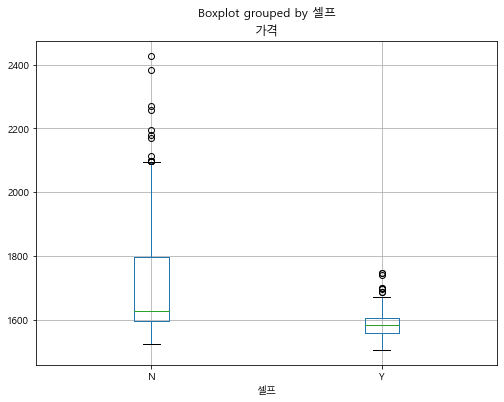

In [75]:
station.boxplot(by='셀프', column='가격',figsize=(8,6))

## 서울에서는 셀프가 훨씬 저렴하다는 결론을 내릴 수 있음. 

#### (2) 어느 상표가 대체적으로 싼지 

<AxesSubplot:xlabel='상표', ylabel='가격'>

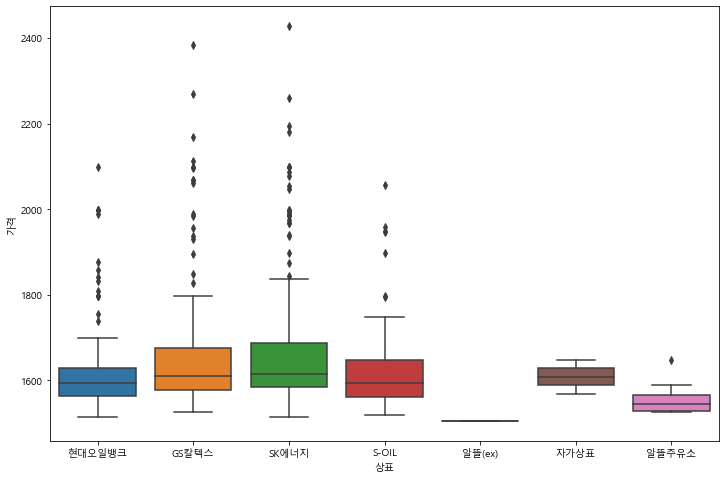

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',data=station)

<AxesSubplot:xlabel='상표', ylabel='가격'>

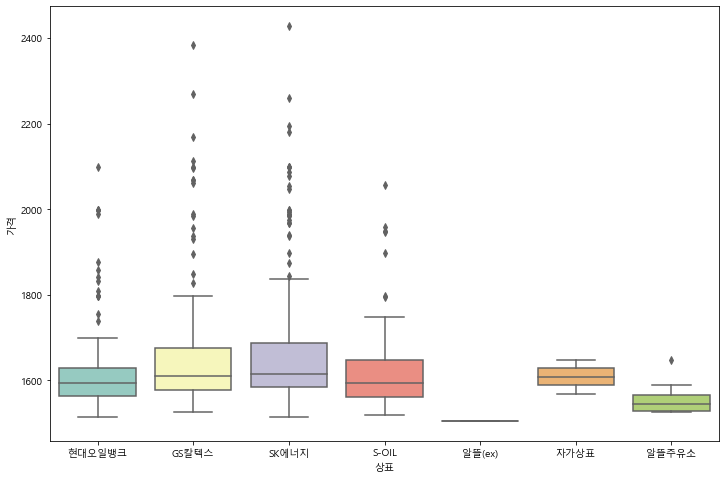

In [77]:
plt.figure(figsize=(12,8))
#색상 변경
sns.boxplot(x='상표',y='가격',data=station,palette='Set3')


<AxesSubplot:xlabel='상표', ylabel='가격'>

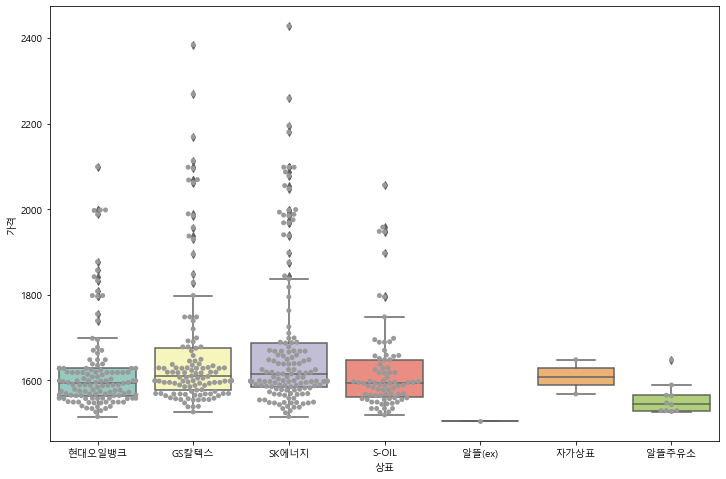

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',data=station,palette='Set3')
#분포 현황을 자세히 볼 수 없을까?
sns.swarmplot(x='상표',y='가격',data=station,color='.6')

#### (3). 구별 주유 가격 확인

In [80]:
station.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구


In [93]:
##### 서울시에서 가장 주유 가격이 비싼 곳은 어디인지
station.sort_values(by='가격',ascending=False).head(10) # 중구
# station.sort_values(by='가격',ascending=True).head(10) # 서초구

,Oil_store,주소,가격,셀프,상표,구
294,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구
259,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구
293,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구
292,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구
473,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구
258,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2180.0,N,SK에너지,용산구
291,약수주유소,서울 중구 다산로 173,2169.0,N,GS칼텍스,중구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구
233,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),2099.0,N,현대오일뱅크,영등포구
283,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구


In [83]:
##### 구별로 평균값 산출 
station.groupby('구')['가격'].mean()

구
강남구     1791.270270
강동구     1682.437500
강북구     1548.153846
강서구     1598.696970
관악구     1626.687500
광진구     1603.714286
구로구     1606.681818
금천구     1585.666667
노원구     1614.142857
도봉구     1558.111111
동대문구    1607.000000
동작구     1610.900000
마포구     1684.333333
서대문구    1578.800000
서초구     1661.771429
성동구     1683.000000
성북구     1571.625000
송파구     1619.406250
양천구     1594.538462
영등포구    1657.000000
용산구     2022.384615
은평구     1578.625000
종로구     1887.444444
중구      2041.800000
중랑구     1571.153846
Name: 가격, dtype: float64

In [84]:
station.pivot_table(index=['구'],aggfunc='mean',values=['가격']).round(2)

,가격
구,
강남구,1791.27
강동구,1682.44
강북구,1548.15
강서구,1598.70
관악구,1626.69
광진구,1603.71
구로구,1606.68
금천구,1585.67
노원구,1614.14


In [85]:
gu_mean=pd.pivot_table(station,index=['구'],values=['가격'],aggfunc='mean')
gu_mean.head()

,가격
구,
강남구,1791.270270
강동구,1682.437500
강북구,1548.153846
강서구,1598.696970
관악구,1626.687500


In [91]:
##### 위의 구별 평균값을 지도로 표시
import folium
import json

map = folium.Map(location=[37.497963,127.027518],zoom_start=10)
#강남역 경도 위도인대..

geo_path= 'data/seoul/skorea_municipalities_geo_simple_seoul.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

map.choropleth(geo_data=geo_str,data=gu_mean,
              columns=[gu_mean.index, '가격'],
              key_on='feature.id',fill_color='PuRd')
map

#### (4) 주유가격 상하위 10개씩 지도에 표시

In [137]:
# 지도에 표시하려면 위도 경도를 알아야함 --> 이때 구글, 카카오에서 api를 받아와야함.

oil_price_top10= station.sort_values(by='가격',ascending=False).head(10) 
oil_price_bottom10=station.sort_values(by='가격',ascending=True).head(10)


oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구
208,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1525.0,Y,S-OIL,양천구
234,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1526.0,Y,현대오일뱅크,강북구
235,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1526.0,Y,S-OIL,강북구
236,수유동주유소,서울 강북구 도봉로 395 (수유동),1526.0,Y,GS칼텍스,강북구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1527.0,N,알뜰주유소,성북구


In [95]:
##### 샘프코드, 1개만 해보자 
import requests

header= {'Authorization': 'KakaoAK 2638ae974e11fe769c128256999b5697'}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울 중구 통일로 30")

requests.get(url,headers=header)
#이걸 어떻게 꺼내오느냐? json으로 보내니까 꺼낼때도 json으로 꺼내야지

<Response [200]>

In [100]:
import requests

header= {'Authorization': 'KakaoAK 2638ae974e11fe769c128256999b5697'}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울 중구 통일로 30")

requests.get(url,headers=header).json()
print(requests.get(url,headers=header).json()['documents'][0]['x'])
print(requests.get(url,headers=header).json()['documents'][0]['y'])

126.972067727197
37.5583624710728


In [102]:
requests.get(url,headers=header).json()['documents'][0]

{'address_name': '서울 중구 봉래동1가 126-2',
 'category_group_code': 'OL7',
 'category_group_name': '주유소,충전소',
 'category_name': '교통,수송 > 자동차 > 주유,가스 > 주유소 > SK주유소',
 'distance': '',
 'id': '11378206',
 'phone': '02-752-2262',
 'place_name': '서남주유소',
 'place_url': 'http://place.map.kakao.com/11378206',
 'road_address_name': '서울 중구 통일로 30',
 'x': '126.972067727197',
 'y': '37.5583624710728'}

In [103]:
station.head()
# 주소에 ()가 있음 이거는 위도 경도를 받아올때 처리를 못함... 

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구


In [110]:
# 괄호를 어떻게 뺄까?
print(oil_price_top10['주소'][259])

print('---------------------------------')

print(oil_price_top10['주소'][259].split(" ("))
print(oil_price_top10['주소'][259].split(" (")[0])

서울 용산구 청파로 367 (서계동)
---------------------------------
['서울 용산구 청파로 367', '서계동)']
서울 용산구 청파로 367


In [139]:
# 그럼 위에 처럼 가져와 보자 
lat=[]
lng=[]

for n in oil_price_top10.index:
    tmp_addr= oil_price_top10['주소'][n].split(" (")[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr)
    
    lat.append(requests.get(url,headers=header).json()['documents'][0]['y'])
    lng.append(requests.get(url,headers=header).json()['documents'][0]['x'])

In [140]:
# 확인
len(lat)
lng

['126.972067727197',
 '126.968973680782',
 '126.99367314920487',
 '126.997147791816',
 '127.035735685446',
 '126.97247589929034',
 '127.01272807915872',
 '127.047170143424',
 '126.927456255768',
 '126.966623460125']

In [141]:
oil_price_top10['lat']=lat
oil_price_top10['lng']=lng

In [142]:
lat=[]
lng=[]

for n in oil_price_bottom10.index:
    tmp_addr1= oil_price_bottom10['주소'][n].split(" (")[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr1)
    
    lat.append(requests.get(url,headers=header).json()['documents'][0]['y'])
    lng.append(requests.get(url,headers=header).json()['documents'][0]['x'])

In [143]:
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng

In [144]:
oil_price_bottom10
oil_price_top10


,Oil_store,주소,가격,셀프,상표,구,lat,lng
294,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구,37.5583624710728,126.972067727197
259,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구,37.552339430427,126.968973680782
293,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구,37.560888397210455,126.99367314920487
292,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구,37.5617318652342,126.997147791816
473,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구,37.5176495710055,127.035735685446
258,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2180.0,N,SK에너지,용산구,37.550217546860225,126.97247589929034
291,약수주유소,서울 중구 다산로 173,2169.0,N,GS칼텍스,중구,37.558993985065825,127.01272807915872
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구,37.5115223360554,127.047170143424
233,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),2099.0,N,현대오일뱅크,영등포구,37.517685858482,126.927456255768
283,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구,37.5745177164839,126.966623460125


In [145]:
map = folium.Map(location=[37.497963,127.027518],zoom_start=12)
for n in oil_price_top10.index:
    folium.CircleMarker(location=[oil_price_top10['lat'][n],oil_price_top10['lng'][n]],
                        popup= oil_price_top10['Oil_store'][n],
                        radius=10, color='#CD3181',fill_color='#CD3181',
                        fill=True).add_to(map)
 
for n in oil_price_bottom10.index:
    folium.CircleMarker(location=[oil_price_bottom10['lat'][n],oil_price_bottom10['lng'][n]],
                        popup= oil_price_bottom10['Oil_store'][n],
                        radius=10, color='#3186CC',fill_color='#3186CC',
                        fill=True).add_to(map)
map

### *.스크래핑 연습
+ https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=제주도날씨


In [ ]:
"""
오늘의 날씨 

----> 서울날씨:30 ℃ 	 구름많음, 어제보다 1˚ 높아요
----> 부산날씨:22 ℃ 	 흐림, 어제보다 4˚ 낮아요
----> 제주도날씨:22 ℃ 	 구름많음, 어제보다 0˚ 높아요
----> 광주날씨:27 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 대전날씨:29 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 경기도날씨:29 ℃ 	 구름많음, 어제보다 2˚ 낮아요


"""

In [ ]:
#utf8&query=제주도날씨 --> 이거에 따라 서울날씨, 부산날씨가 달라짐 
#일단 하나씩 해보자 

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="서울날씨 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'서울날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'서울날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>서울날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211021.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic
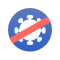
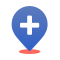
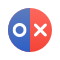
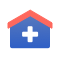

In [7]:
url_s= 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=서울날씨'
html=requests.get(url_s) # e.g. urlopen
html.text # 전체 페이지, 하나의 문자열로 가져옴, 그래서 원하는 것가져오기 힘듦
# 그래서 객체화를 시켜줌(트리구조로) 그래야 원하는 것들을 가져올 수 있음.
seoul=BeautifulSoup(html.text,'html.parser')#그게 BeautifulSoup
seoul#이제 tag로 묶여짐 이제 find 사용할 수 있음(일반 문자열에선 사용할 수 없었던)


In [8]:
seoul.find('div',class_='weather_info').get_text()

'  오늘의 날씨   맑음   현재 온도9°    어제보다 2° 낮아요  맑음   강수확률 0% 습도 91% 바람(북동풍) 2m/s       미세먼지 보통     초미세먼지 보통     자외선 좋음     일몰 17:22      '

In [9]:
url_j='https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=제주날씨'
html = requests.get(url_j)
jeju = BeautifulSoup(html.text,'html.parser')
jeju.find('div',class_='weather_info').get_text()

'  오늘의 날씨   맑음   현재 온도14°    어제보다 1° 낮아요  맑음   강수확률 0% 습도 61% 바람(북서풍) 2m/s       미세먼지 보통     초미세먼지 보통     자외선 좋음     일몰 17:32      '

In [10]:
# 한번에 구하기
loc = ['서울','부산','제주','광주','대전','경기도']
for i in loc:
    try:
        url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}날씨'.format(i)
        html = requests.get(url)
        soup = BeautifulSoup(html.text,'html.parser')
        msg= soup.find('div',class_='weather_info').get_text()
    except Except as e:
        print('오류 :',e)
    else:
        print(msg)
        print('--------------------------------')

  오늘의 날씨   맑음   현재 온도10°    어제보다 4° 낮아요  맑음   강수확률 0% 습도 80% 바람(동풍) 0m/s       자외선 좋음     일몰 17:22      
--------------------------------
  오늘의 날씨   맑음   현재 온도13°    어제보다 3° 낮아요  맑음   강수확률 0% 습도 55% 바람(북서풍) 3m/s       자외선 좋음     일몰 17:19      
--------------------------------
  오늘의 날씨   맑음   현재 온도13°    어제보다 2° 낮아요  맑음   강수확률 0% 습도 50% 바람(북서풍) 2m/s       미세먼지 보통     초미세먼지 보통     자외선 좋음     일몰 17:32      
--------------------------------
  오늘의 날씨   맑음   현재 온도11°    어제보다 3° 낮아요  맑음   강수확률 0% 습도 90% 바람(서풍) 0m/s       미세먼지 보통     초미세먼지 매우나쁨     자외선 좋음     일몰 17:27      
--------------------------------
  오늘의 날씨   맑음   현재 온도10°    어제보다 5° 낮아요  맑음   강수확률 0% 습도 80% 바람(북서풍) 0m/s       자외선 좋음     일몰 17:23      
--------------------------------
  오늘의 날씨   맑음   현재 온도5°    어제보다 7° 낮아요  맑음   강수확률 0% 습도 90% 바람(남풍) 0m/s       미세먼지 보통     초미세먼지 나쁨     자외선 좋음     일몰 17:20      
--------------------------------


In [ ]:
url = 'http://ncov.mohw.go.kr/'

"""
오늘의 국내 코로나 현황 요약

--> 오늘의 신규 확진자 :전일대비 (+ 399)
--> 현재까지 확진자 :(누적)148,273

"""

In [13]:
url = 'https://www.naver.com'
#e.g. 연합 뉴스
"""
오늘의 뉴스 
---> 정은경 "백신 오접종 총 105건 발생…90건이 접종대상 오류"
---> G7 회의서 드러난 일본 속내…가입 반대·회담 일방취소
---> 코스피 일주일 만에 최고치 경신… 3,252.13 마감
---> 가해자 조사 뭉갠 공군검찰 수사 압색 후 '잠잠'…봐주기식 우려
---> 전두환 재판 불출석…조영대 신부 "부정해도 죄 가릴 수 없다"
---> 우체국 택배노조 "사회적 합의 어겨"…점거농성 돌입
---> 이준석 "파격이 새로움 넘어 여의도의 새 표준 돼야"
---> 박용진 "파죽지세로 나가겠다…우파 정책도 끌어안아야"
---> 청양 저수지 쇠줄 두른 시신은 50대 지역 주민
---> 머스크 비트코인 결제 중단 번복하자 비트코인 11% 뛰어

"""
html = requests.get(url)
soup = BeautifulSoup(html.text,'html.parser')
news = soup.find_all('a','issue')
for i in news[0:10]:
    print('오늘의 뉴스')
    print("---->",i.get_text())

오늘의 뉴스
----> 한국 가계빚, 우울한 세계 2관왕…GDP 대비 최대·증가 속도 1위
오늘의 뉴스
----> 신규확진 2천6명, 휴일에도 2천명대…위중증 환자 471명
오늘의 뉴스
----> 중대본 "전면등교·연말모임이 위험요인…수도권 병상 아슬아슬"
오늘의 뉴스
----> 오늘부터 50대도 부스터샷…위중증 환자 증가세 잡힐까
오늘의 뉴스
----> 이재명의 국토보유세는 어떤 세금일까…모든 토지에 부과
오늘의 뉴스
----> "文대통령 37.3%-민주당 28.5%…당청 지지율 소폭 상승"
오늘의 뉴스
----> "다자대결서 윤석열 45.6%, 이재명 32.4%"
오늘의 뉴스
----> 한국서 전기차 올해 3분기까지 7만1천대 팔렸다…세계 7위
오늘의 뉴스
----> '트레블 버블' 맺은 싱가포르서 관광객 첫 입국…무격리 관광
오늘의 뉴스
----> 아르바이트생 치어 숨지게한 음주뺑소니 운전자 법정최고형 구형


In [ ]:
url:'https://search.naver.com/search.naver?sm=tab_hty.top&whttps://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EB%A9%9C%EB%A1%A0%EC%B0%A8%ED%8A%B8&tqi=UrZ0HsprvN8ssK5ZP%2BsssssstVh-314088here=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EC%9D%8C%EC%9B%90&tqi=hKk9udp0J14ssfLos3Kssssssl4-396598"
    """
    1위 방탄소년단 -  Butter 
2위 aespa -  Next Level 
3위 오마이걸(OH MY GIRL) -  Dun Dun Dance 
4위 헤이즈 (Heize) -  헤픈 우연 
5위 브레이브걸스(Brave Girls) -  롤린 (Rollin') 
6위 아이유(IU) -  라일락 
7위 Justin Bieber -  Peaches (Feat. Daniel Caesar, Giveon) 
8위 STAYC(스테이씨) -  ASAP 
9위 조이 (JOY) -  안녕 (Hello) 
9위 방탄소년단 -  Dynamite 
    
    """
